In [19]:
# Code by Vincent Hong
# Import modules
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import pyplot as plt
import numpy as  np

# Loading the json file that containins my secret MongoDB connection string
with open (r'C:\Users\hsely\OneDrive\Documents\GitHub\DA320\Week 5\credentials.json') as u:
    data = json.load(u)

secret_key = data['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 67 characters in length.


In [20]:
# Code by Vincent Hong
# Connecting to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetching my database titled "DA320"
db = client.DA320

# Accessing my collections from my "DA320" database
allCollections = db.list_collection_names()

# Print statements that display the current version as well as the collections present in DA320
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.13.
This database has the collections ['IMDB', 'IMDB_Pipeline_View']


In [21]:
# Code by Professor Spence
# Retrieving all records from the "IMDB" pipeline aggregate view
cursor = db.IMDB_Pipeline_View.find()

# Converting the information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Displaying the first few records 
imdb.head()

,_id,title,release_date,runtime_minutes,user_rating,user_votes,budget,opening_weekend,gross_sales,genres,ratings,cast,directors,producers,company,main_rating,release_year,release_month,release_day
0,63634332c0b8bb0261b36c54,Grease,1978-06-13,110.0,7.2,265183,6000000.0,60759.0,394955690.0,"[Comedy, Musical, Romance]","[TV-14, (D)]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organizat...",TV-14,1978,6,13
1,63634332c0b8bb0261b36c55,Superman,1978-12-10,143.0,7.4,172769,55000000.0,7465343.0,166200000.0,"[Action, Adventure, Sci-Fi]","[TV-PG, (LV)]","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internation...",TV-PG,1978,12,10
2,63634332c0b8bb0261b36c56,The Deer Hunter,1978-12-08,183.0,8.1,334827,15000000.0,NaN,NaN,"[Drama, War]",[R],"[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]",R,1978,12,8
3,63634332c0b8bb0261b36c57,Halloween,1978-10-25,91.0,7.7,267109,300000.0,NaN,70000000.0,"[Horror, Thriller]",[TV-14],"[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Intern...",TV-14,1978,10,25
4,63634332c0b8bb0261b36c58,National Lampoon's Animal House,1978-07-27,109.0,7.4,119917,3000000.0,201747.0,3371006.0,[Comedy],"[TV-14, (DLSV, TV Rating.)]","[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, Stag...",TV-14,1978,7,27


KeyError: 'release_year'

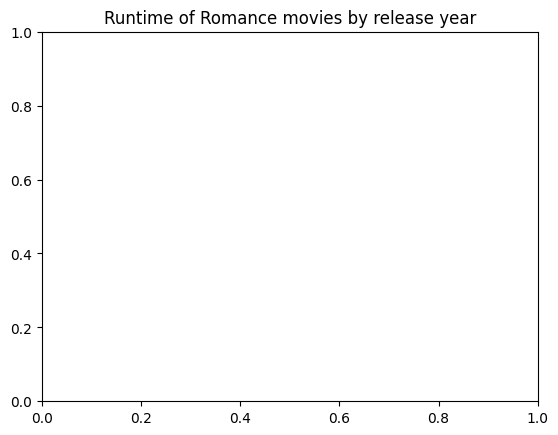

In [29]:
# Code by Professor Spence

# Query the view to find movies released in 1978
cursor = db["IMDB_Pipeline_View"].find({"release_year": {"$in": ["1978"]}})
year1978_films = pd.DataFrame(cursor)

# Plotting Runtime of movies released year 1978 in a Scatter Plot
plt.title('Runtime of Romance movies by release year')
plt.scatter(year1978_films['release_year'], year1978_films['runtime_minutes'])
plt.xlabel('Release Date')
plt.ylabel('Runtime')
plt.show()

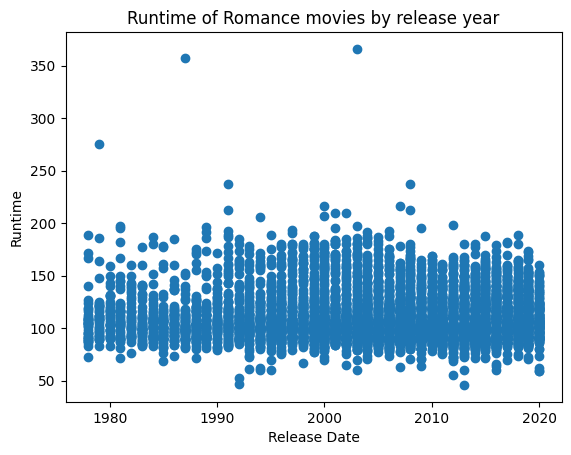

In [28]:
# Code by Professor Spence

# Query the view to find romance movies
cursor = db["IMDB_Pipeline_View"].find({"genres": {"$in": ["Romance"]}})
romance_films = pd.DataFrame(cursor)

# Plotting Runtime of Romance movies by release year in a Scatter Plot
plt.title('Runtime of Romance movies by release year')
plt.scatter(romance_films['release_year'], romance_films['runtime_minutes'])
plt.xlabel('Release Date')
plt.ylabel('Runtime')
plt.show()